In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv('../../Reviews.csv')
df = df.head(500)

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<Axes: title={'center': 'Count of Reviews by Stars'}, xlabel='Score'>

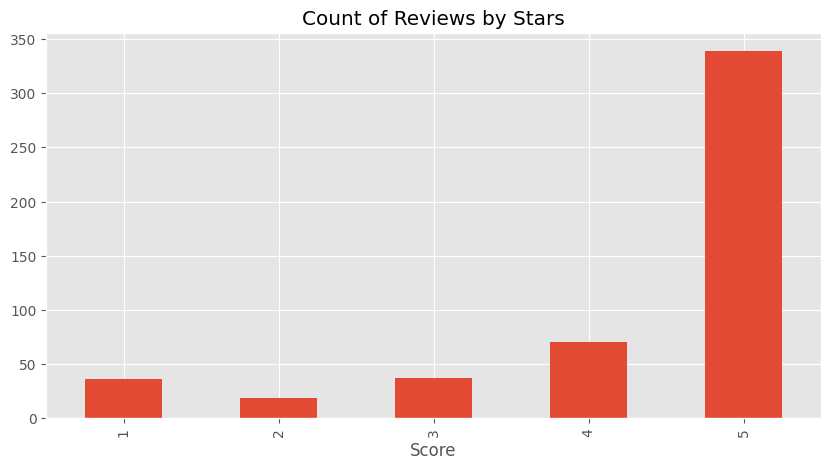

In [3]:
df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))

In [4]:
example = df['Text'][50]

example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [5]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', 'Its', 'mushy', 'soft', 'I', 'don']

In [6]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens, lang="eng")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/hasabir/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [7]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

entities =  nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /home/hasabir/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /home/hasabir/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  Its/PRP$
  mushy/JJ
  soft/JJ
  I/PRP
  don/VBP
  t/NNS
  like/IN
  it/PRP
  (PERSON Quaker/NNP Oats/NNP)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB)


In [8]:
# VADER Seniment Scoring

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/hasabir/nltk_data...


In [9]:
sia.polarity_scores("i am so happy")
sia.polarity_scores("this is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [10]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
res= {}
for i , row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    my_id = row['Id']
    res[my_id] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [12]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


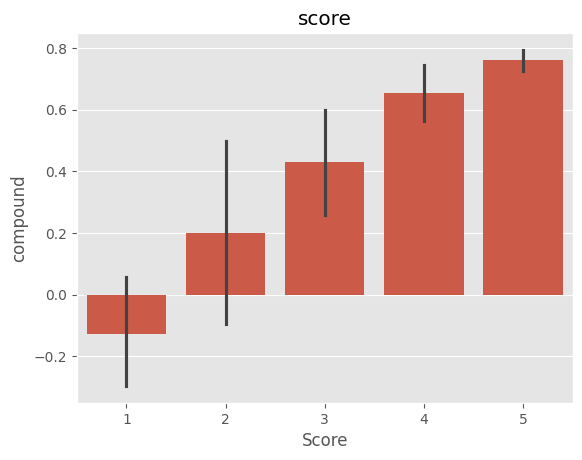

In [13]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('score')
plt.show()

<Axes: xlabel='Score', ylabel='pos'>

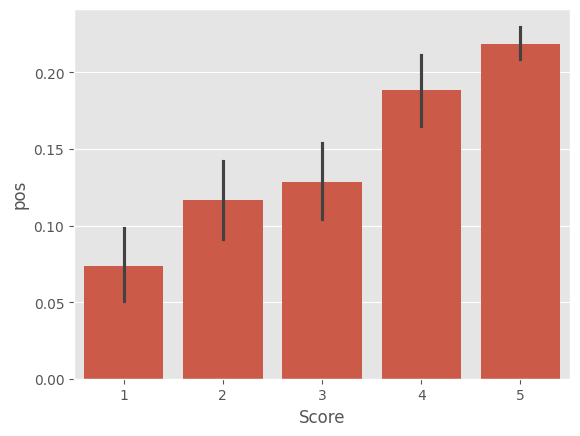

In [14]:
# fig, axs = plt.subplot(1, 3 , figsize=(15, 5))
sns.barplot(data=vaders, x='Score', y='pos')

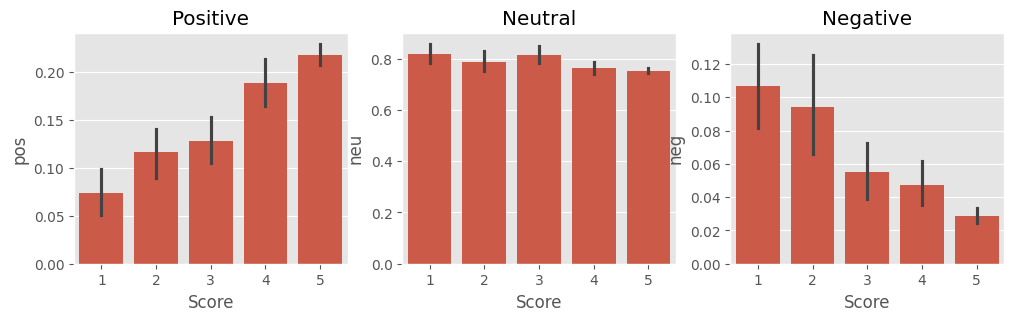

In [15]:
fig, axs = plt.subplots(1, 3,figsize=(12, 3))
sns.barplot(data=vaders, x= 'Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x= 'Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x= 'Score', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')


plt.show()

In [16]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [17]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/home/hasabir/miniconda3/envs/ai/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
#ROBERTA model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'negative': scores[0],
    'neutral': scores[1],
    'positive': scores[2]
}
scores_dict

{'negative': 0.97635514, 'neutral': 0.020687466, 'positive': 0.0029573692}

In [ ]:
def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'negative': scores[0],
        'neutral': scores[1],
        'positive': scores[2]
    }
    return scores_dict

In [65]:
vader_res = {}
roberta_res = {}
result = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        my_id = row['Id']
        
        vader_res[my_id] = sia.polarity_scores(text)
        vader_results = {f'vader_{key}': value for key, value in vader_res[my_id].items()}
        
        roberta_res[my_id] = polarity_scores_roberta(text)
        roberta_results = {f'roberta_{key}': value for key, value in roberta_res[my_id].items()}
        
        both_results = {**vader_results, **roberta_results}
        result[my_id] = both_results
    except Exception as e:
        print(f'Error with {my_id}')

result



  0%|          | 0/500 [00:00<?, ?it/s]

Error with 83
Error with 187


{1: {'vader_neg': 0.0,
  'vader_neu': 0.695,
  'vader_pos': 0.305,
  'vader_compound': 0.9441,
  'roberta_negative': 0.009624235,
  'roberta_neutral': 0.049980413,
  'roberta_positive': 0.94039536},
 2: {'vader_neg': 0.138,
  'vader_neu': 0.862,
  'vader_pos': 0.0,
  'vader_compound': -0.5664,
  'roberta_negative': 0.50898606,
  'roberta_neutral': 0.4524136,
  'roberta_positive': 0.03860036},
 3: {'vader_neg': 0.091,
  'vader_neu': 0.754,
  'vader_pos': 0.155,
  'vader_compound': 0.8265,
  'roberta_negative': 0.0032289,
  'roberta_neutral': 0.09806747,
  'roberta_positive': 0.8987037},
 4: {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0,
  'roberta_negative': 0.0022951285,
  'roberta_neutral': 0.09021921,
  'roberta_positive': 0.90748566},
 5: {'vader_neg': 0.0,
  'vader_neu': 0.552,
  'vader_pos': 0.448,
  'vader_compound': 0.9468,
  'roberta_negative': 0.0016347291,
  'roberta_neutral': 0.0103024645,
  'roberta_positive': 0.98806286},
 6: {'vader_ne

In [66]:
results_df = pd.DataFrame(result).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')


In [67]:
results_df.head()


,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


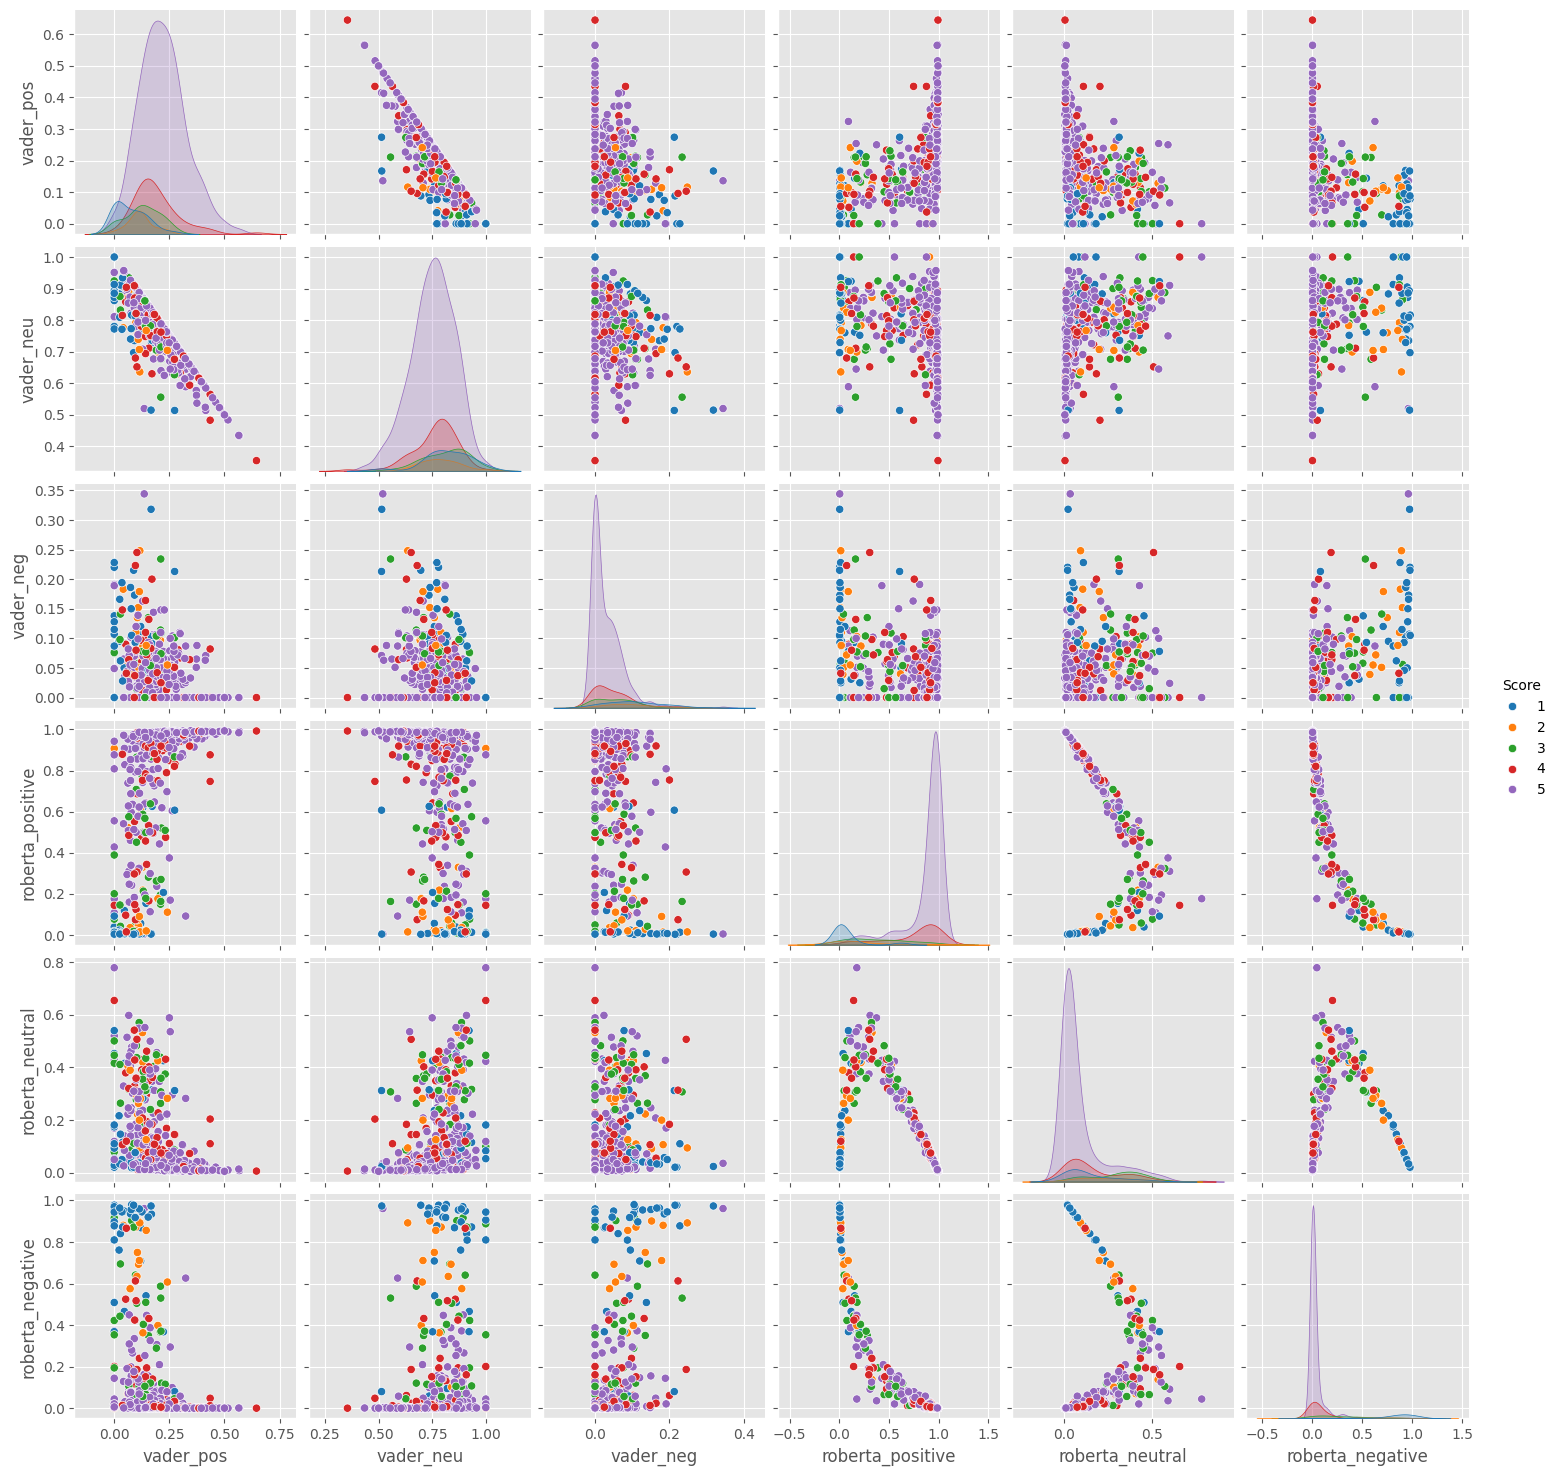

In [69]:
sns.pairplot(results_df[['vader_pos', 'vader_neu', 'vader_neg', 'roberta_positive', 'roberta_neutral', 'roberta_negative', 'Score']],
             hue='Score',
             palette='tab10')
plt.show()

In [83]:
test = results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]
test2 = results_df.query('Score == 5').sort_values('roberta_negative', ascending=False)['Text'].values[0]
print(f"{test}\n-----------------\n{test2}")

this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault
-----------------
this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault


In [84]:
from transformers import pipeline

sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/home/hasabir/miniconda3/envs/ai/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [85]:
sent_pipeline(test)

[{'label': 'NEGATIVE', 'score': 0.9980344176292419}]